In [147]:
import pandas as pd
import geopandas as gp
import maup

In [ ]:
https://www.bossierparishla.gov/docs/default-source/police-jury/gis-maps/bossier-parish-precincts413e312673914f739326fa8be978d069.pdf?sfvrsn=d8d4aced_8

In [ ]:
https://bossierparishla.gov/docs/default-source/police-jury/meeting-documents/meeting-minutes/2023/06-21-2023.pdf?sfvrsn=58ec308a_2

In [148]:
results = pd.read_csv("/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Bossier_Parish_06_17_24/raw-from-source/bossier - ByPrecinct_67249.csv")

In [149]:
results_org = results.copy(deep = True)

In [150]:
precs = gp.read_file("/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Bossier_Parish_06_17_24/raw-from-source/la_2024_gen_prec/la_2024_gen_all_prec/la_2024_gen_all_prec.shp")

In [151]:
precs = precs[precs["Parish"]=="Bossier"].copy(deep = True)

In [152]:
import numpy as np

In [153]:
results["Prec_Clean"] = np.where(results["Precinct"].str.contains("-"),results["Precinct"].str.split(" -").str[0], results["Precinct"])

In [154]:
results["Prec_Clean"] = np.where(results["Prec_Clean"].str[0]=="0",results["Prec_Clean"].str[1:], results["Prec_Clean"])

In [155]:
results["UNIQUE_ID"] = results["Ward"].astype(str)+"-"+results["Prec_Clean"].astype(str)

In [157]:
results = results[["UNIQUE_ID","Cochran ","Jeter","Smith"]].groupby("UNIQUE_ID", as_index = False).sum()

In [158]:
test = gp.GeoDataFrame(pd.merge(results, precs, left_on = "UNIQUE_ID", right_on = "NAME20", how = "left", indicator = True))

<Axes: >

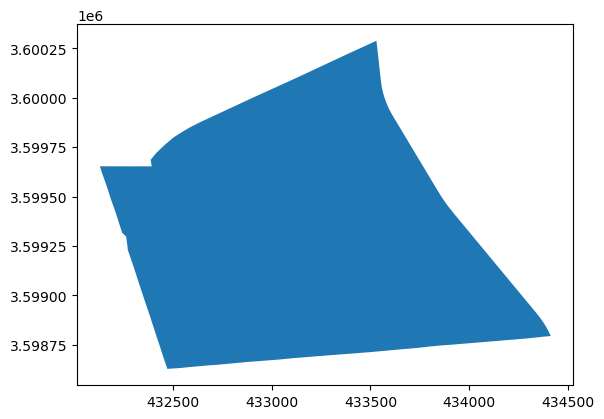

In [161]:
test[test["UNIQUE_ID_x"]=="2-11"].plot()

In [162]:
set(results["UNIQUE_ID"]).difference(precs["NAME20"])

set()

In [163]:
la_blocks = gp.read_file("/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Bossier_Parish_06_17_24/raw-from-source/la_pl2020_b/la_pl2020_b.shp")

In [164]:
la_blocks = la_blocks.to_crs(test.crs)
la_blocks = la_blocks[la_blocks["PLACENS"]=="02403899"].copy(deep = True)

In [165]:
import maup

In [166]:
test.index = test["UNIQUE_ID_x"]

In [167]:
la_blocks["PREC"] = maup.assign(la_blocks, test)

<Axes: >

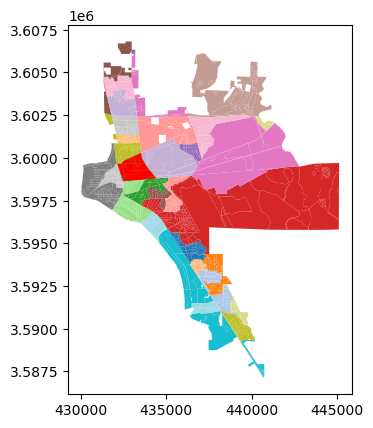

In [171]:
ax = la_blocks.plot(column = "PREC", cmap = "tab20")
la_blocks[la_blocks["PREC"]=="2-11"].plot(ax = ax, color = "red")

In [173]:
precs_2024 = gp.read_file("/Users/peterhorton/Documents/RDH/pber_local/LA_2024/general/raw-from-source/2024 Precinct Shapefiles (12-31-2024)/_2024 Precinct Shapefiles (12-31-2024).shp")

In [175]:
precs_2024[precs_2024["NAME20"]=="2-11"]

,ID,AREA,OBJECTID,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,...,UNIT_NAME,COUNTY,MCD,PLACE,VTD,TRACT,BGROUP,BLOCK,TOT_POP,geometry
556,2947,0.583656,8232,22,017,2-11,220172-11,None,2-11,2-11,...,2-11,017,None,None,2-11,None,None,None,1465,"POLYGON ((-93.79097 32.50273, -93.78914 32.503..."
836,1635,0.845779,2664,22,015,002-11,22015002-11,A,2-11,2-11,...,2-11,015,None,None,2-11,None,None,None,1849,"POLYGON ((-93.72272 32.53215, -93.72252 32.532..."
1930,1057,0.603162,1963,22,057,002-11,22057002-11,A,2-11,2-11,...,2-11,057,None,None,2-11,None,None,None,1847,"POLYGON ((-90.81036 29.77620, -90.81087 29.776..."
2347,2334,1.582662,2865,22,033,002-11,22033002-11,A,2-11,2-11,...,2-11,033,None,None,2-11,None,None,None,1503,"POLYGON ((-91.14400 30.52556, -91.14388 30.525..."


In [95]:
la_blocks = la_blocks[[i for i in list(la_blocks.columns) if i[0]=="P" and i not in ["PLACE","PLACECC","PLACENS"]]].groupby("PREC").sum()

In [101]:
final = pd.merge(results, la_blocks, right_on = "PREC", left_on = "UNIQUE_ID", how = "outer", validate = "1:1", indicator = True)

In [103]:
final["_merge"].value_counts()

_merge
both          40
left_only      0
right_only     0
Name: count, dtype: int64

In [106]:
final.drop("_merge", axis = 1, inplace = True)

In [108]:
final.sum()

UNIQUE_ID    1-11-21-31-3A1-3B1-41-52-102-112-12A2-12B2-132...
Cochran                                                   1460
Jeter                                                     1617
Smith                                                     1625
POP100                                                   62701
                                   ...                        
P0050006                                                     0
P0050007                                                   497
P0050008                                                     0
P0050009                                                   316
P0050010                                                   181
Length: 303, dtype: object

In [111]:
results_org.sum()

Office      Councilmen at Large -- City of Bossier CityCou...
Parish      BossierBossierBossierBossierBossierBossierBoss...
Ward                                                      103
Precinct    12303A03B452303A04 -104 -205A6789101112A12B131...
Cochran                                                  1460
Jeter                                                    1617
Smith                                                    1625
dtype: object

In [114]:
pl_fields = pd.read_csv("/Users/peterhorton/Downloads/pl_fields_and_descriptions.csv")

In [120]:
apb_cols = list(pl_fields[(pl_fields["Table"]=="P4")&(pl_fields["text_name"].str.contains("Black"))]["var_name"].unique())

In [122]:
apb_cols

['P0040006',
 'P0040013',
 'P0040018',
 'P0040019',
 'P0040020',
 'P0040021',
 'P0040029',
 'P0040030',
 'P0040031',
 'P0040032',
 'P0040039',
 'P0040040',
 'P0040041',
 'P0040042',
 'P0040043',
 'P0040044',
 'P0040050',
 'P0040051',
 'P0040052',
 'P0040053',
 'P0040054',
 'P0040055',
 'P0040060',
 'P0040061',
 'P0040062',
 'P0040063',
 'P0040066',
 'P0040067',
 'P0040068',
 'P0040069',
 'P0040071',
 'P0040073']

In [123]:
final["TOT_POP"] = final["P0010001"]
final["TOT_VAP"] = final["P0030001"]
final["HIS_VAP"] = final["P0040002"]
final["WHI_VAP_NH"] = final["P0040005"]
final["APB_VAP_NH"] = final[apb_cols].sum(axis = 1)
final["OTH_VAP_NH"] = final["TOT_VAP"] - final["HIS_VAP"] - final["WHI_VAP_NH"] - final["APB_VAP_NH"]

In [125]:
final["Total_check"] = final[["HIS_VAP","WHI_VAP_NH","APB_VAP_NH","OTH_VAP_NH"]].sum(axis = 1)

In [129]:
final.drop([i for i in list(final.columns) if i[0]=="P"], axis = 1, inplace = True)

In [131]:
final.drop("Total_check", axis = 1, inplace = True)

In [133]:
final["Ward"] = final["UNIQUE_ID"].apply(lambda x:x.split("-")[0])
final["Precinct"] = final["UNIQUE_ID"].apply(lambda x:x.split("-")[1])

In [139]:
final.columns

Index(['UNIQUE_ID', 'Cochran ', 'Jeter', 'Smith', 'TOT_POP', 'TOT_VAP',
       'HIS_VAP', 'WHI_VAP_NH', 'APB_VAP_NH', 'OTH_VAP_NH', 'Ward',
       'Precinct'],
      dtype='object')

In [141]:
final = final[['UNIQUE_ID','Ward',
       'Precinct', 'Cochran ', 'Jeter', 'Smith', 'TOT_POP', 'TOT_VAP',
       'HIS_VAP', 'WHI_VAP_NH', 'APB_VAP_NH', 'OTH_VAP_NH' ]]

In [1]:
final.to_csv("./bossier_city_la_city_council_03_25.csv", index = False)

NameError: name 'final' is not defined